In [81]:
import PyPDF2 as pypdf 
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np
from os import path
from nltk.probability import FreqDist
import matplotlib.pyplot as plt




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Desktop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Lendo o arquivo com o livro Memórias Póstumas de Brás Cubas baixado no Portal Domínio Público 

In [82]:
pdfobj = open("memoriasBras.pdf", "rb")
reader = pypdf.PdfFileReader(pdfobj)
#vendo o número de páginas 
print(reader.numPages)

140


## Extraindo o texto do PDF e salvando em um arquivo .txt

In [83]:
num_pages = reader.numPages
outfile = "out_text.txt"
f = open(outfile, "wb")

for page_number in range(0, num_pages):
    pageObj = reader.getPage(page_number)
    texts = pageObj.extractText()
    f.write(texts.encode('utf8'))
    
f.close()

## Criando uma função para ler o livro 

In [84]:
def read_book(title_path):  
    with open(title_path, "r", encoding ="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text
 


## Lendo o livro 

In [85]:
text = read_book("out_text.txt")
tokenized_word=word_tokenize(text)
# Deixando em letras minusculas 
tokenized_word_2 = [w.lower() for w in tokenized_word]


## Removendo stopwords (preposições, conjunções e outras palavras que não nos interessam)

In [86]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words("portuguese"))

#Adicionando mais stopwords
stop_words.update((',','.',';','š','!','...','?', ':', '/', 'capítulo'))

tokenized_word_final = []
for p in tokenized_word_2:
    if p not in stop_words:
        tokenized_word_final.append(p)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Desktop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# As 20 palavras mais usadas por Machado de Assis em Memórias Póstumas de Brás Cubas

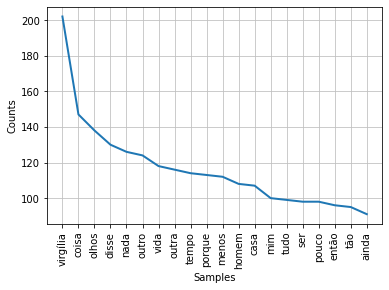

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [87]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_word_final)
fdist.most_common(20)

fdist.plot(20,cumulative=False)

